In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [166]:
band_0=pd.read_csv('T72_Band_0.csv')
band_1=pd.read_csv('T72_Band_1.csv')
band_2=pd.read_csv('T72_Band_2.csv')
band_4=pd.read_csv('T72_Band_4.csv')
band_5=pd.read_csv('T72_Band_5.csv')
band_6=pd.read_csv('T72_Band_6.csv')
band_7=pd.read_csv('T72_Band_7.csv')
band_8=pd.read_csv('T72_Band_8.csv')
band_9=pd.read_csv('T72_Band_9.csv')

In [167]:
df = pd.concat([band_0, band_1, band_2, band_4, band_5, band_6, band_7, band_8, band_9])

In [168]:
df.head()

coolant_temperature  oil_pressure  oil_TDN1  oil_temp1  oil_TDN2  \
0               21.125      8.808777     563.9      13.55     522.2   
1               21.875      8.808777     564.3      13.57     522.2   
2               22.500      8.871473     564.3      13.57     532.0   
3               23.250      8.996865     564.3      13.57     534.9   
4               23.875      9.059561     564.3      13.57     536.8   

   oil_temp2  vibration_1_x  vibration_1_y  vibration_1_z  vibration_1_n  \
0      11.23        13.3984       11.37256       27.58434       104.0975   
1      11.23        13.3984       11.37256       27.58434       104.0975   
2      11.78        13.3984       11.37256       27.58434       104.0975   
3      11.94        13.3984       11.37256       27.58434       104.0975   
4      12.04        13.3984       11.37256       27.58434       104.0975   

   vibration_2_x  vibration_2_y  vibration_2_z  vibration_2_n  vibration_3_x  \
0       10.10253       12.97081       13.94839       105.5033       15.90996   
1       10.10253       12.97081       13.94839       105.5033       15.90996   
2       10.10253       12.97081       13.94839       105.5033       15.90996   
3       10.10253       12.97081       13.94839       105.5033       15.90996   
4       10.10253       12.97081       13.94839       105.5033       15.90996   

   vibration_3_y  vibration_3_z  vibration_3_n  vibration_4_x  vibration_4_y  \
0       12.47154        23.2417       99.21579       29.16340       27.72714   
1       12.47154        23.2417       99.21579       30.50223       28.85213   
2       12.47154        23.2417       99.21579       33.90517       29.89100   
3       12.47154        23.2417       99.21579       28.37876       26.87714   
4       12.47154        23.2417       99.21579       30.29640       28.14903   

   vibration_4_z  vibration_4_n  vtotal_rms  vtotal_rms_noise  vtotal_x_rms  \
0       40.74029       104.2352       22.40           103.726        20.345   
1       44.35425       101.3781       22.78            99.822        20.135   
2       45.51253       104.4014       22.78            99.822        20.135   
3       39.65763       103.8852       22.78            99.822        20.135   
4       41.01107       105.9851       22.78            99.822        20.135   

   vtotal_y_rms  band  
0        22.856     0  
1        24.445     0  
2        24.445     0  
3        24.445     0  
4        24.445     0

In [169]:
df.shape

(456, 27)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 220
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   coolant_temperature  456 non-null    float64
 1   oil_pressure         456 non-null    float64
 2   oil_TDN1             456 non-null    float64
 3   oil_temp1            456 non-null    float64
 4   oil_TDN2             456 non-null    float64
 5   oil_temp2            456 non-null    float64
 6   vibration_1_x        456 non-null    float64
 7   vibration_1_y        456 non-null    float64
 8   vibration_1_z        456 non-null    float64
 9   vibration_1_n        456 non-null    float64
 10  vibration_2_x        456 non-null    float64
 11  vibration_2_y        456 non-null    float64
 12  vibration_2_z        456 non-null    float64
 13  vibration_2_n        456 non-null    float64
 14  vibration_3_x        456 non-null    float64
 15  vibration_3_y        456 non-null    float64


In [171]:
def replace_zeros_with_nan(df):
  return df.replace(0.0, np.nan)

In [172]:
df = replace_zeros_with_nan(df)

In [173]:
df = df.reset_index(drop = True)

In [174]:
df

coolant_temperature  oil_pressure    oil_TDN1  oil_temp1  oil_TDN2  \
0                21.1250      8.808777  563.900000  13.550000     522.2   
1                21.8750      8.808777  564.300000  13.570000     522.2   
2                22.5000      8.871473  564.300000  13.570000     532.0   
3                23.2500      8.996865  564.300000  13.570000     534.9   
4                23.8750      9.059561  564.300000  13.570000     536.8   
5                18.0000     16.000000  564.300000  13.570000     495.4   
6                19.0000     16.000000  564.300000  13.570000     495.4   
7                20.0000     16.000000  564.300000  13.570000     515.1   
8                21.1250     16.000000  564.300000  13.570000     519.2   
9                22.2500     16.000000  564.300000  13.570000     525.2   
10               35.7500      9.498433         NaN        NaN     549.6   
11               36.2500      9.373041         NaN        NaN     549.2   
12               36.5000      9.373041         NaN        NaN     548.7   
13               37.5000      9.373041         NaN        NaN     548.3   
14               37.7500      9.310345         NaN        NaN     547.8   
15               38.7500      9.310345         NaN        NaN     547.4   
16               39.2500      9.310345         NaN        NaN     546.9   
17               40.5000      9.247649         NaN        NaN     546.9   
18               41.5000      9.498433         NaN        NaN     623.3   
19               42.5000      9.373041         NaN        NaN     623.3   
20               44.0000      9.373041         NaN        NaN     623.3   
21               45.2500      9.373041         NaN        NaN     623.3   
22               46.2500      9.310345         NaN        NaN     669.5   
23               47.5000      9.310345         NaN        NaN     670.0   
24               48.7500      9.310345         NaN        NaN     670.5   
25               49.7500      9.247649         NaN        NaN     671.0   
26               44.0000      7.247649         NaN        NaN     546.9   
27               44.7500      7.373041         NaN        NaN     547.8   
28               45.7500      7.310345         NaN        NaN     548.3   
29               42.0000      7.247649         NaN        NaN     545.1   
30               43.0000      7.310345  388.200000   3.780000     545.1   
31               44.0000      7.247649  388.200000   3.780000     546.9   
32               44.7500      7.373041  396.400000   4.240000     547.8   
33               45.7500      7.310345  396.800000   4.270000     548.3   
34               35.7500     10.557994  388.200000   3.780000     361.0   
35               37.0000     10.620690  388.200000   3.780000     366.8   
36               38.2500     10.557994  396.400000   4.240000     366.8   
37               39.5000     10.000000  396.800000   4.270000     366.8   
38               58.0000      9.561129         NaN        NaN     651.1   
39               59.5000      9.498433         NaN        NaN     651.1   
40               61.0000      9.435737         NaN        NaN     651.6   
41               62.7500      9.373041         NaN        NaN     652.2   
42               30.1250      9.122257         NaN        NaN     510.5   
43               30.7500      9.310345         NaN        NaN     510.5   
44               31.3750      9.247649         NaN        NaN     510.5   
45               32.0000      9.184953         NaN        NaN     510.5   
46               32.7500      9.184953         NaN        NaN     510.5   
47               33.5000      9.310345         NaN        NaN     510.5   
48               34.2500      9.184953         NaN        NaN     510.5   
49               35.0000      9.184953         NaN        NaN     510.5   
50               35.7500      9.122257         NaN        NaN     510.5   
51               36.2500      9.059561         NaN        NaN     510.5   
52               37.0000      

In [175]:
df['band'] = df['band'].fillna(0)

In [176]:
df.isnull().sum()

coolant_temperature     1
oil_pressure            3
oil_TDN1               89
oil_temp1              89
oil_TDN2                2
oil_temp2               2
vibration_1_x           0
vibration_1_y           0
vibration_1_z           0
vibration_1_n           0
vibration_2_x           4
vibration_2_y           4
vibration_2_z           4
vibration_2_n           4
vibration_3_x           0
vibration_3_y           0
vibration_3_z           0
vibration_3_n           0
vibration_4_x          55
vibration_4_y          17
vibration_4_z          17
vibration_4_n          14
vtotal_rms              0
vtotal_rms_noise        0
vtotal_x_rms            0
vtotal_y_rms            0
band                    0
dtype: int64

In [177]:
df['oil_TDN1'].describe()

count    367.000000
mean     488.397033
std      121.378926
min      382.000000
25%      401.988889
50%      421.200000
75%      533.000000
max      822.400000
Name: oil_TDN1, dtype: float64

In [178]:
df['oil_temp1'].describe()

count    367.000000
mean       9.353733
std        6.742541
min        3.440000
25%        4.553333
50%        5.620000
75%       11.830000
max       27.910000
Name: oil_temp1, dtype: float64

In [179]:
from sklearn.impute import KNNImputer

def impute_knn(dataframe, n_neighbors=5):
    # Create an instance of KNNImputer
    imputer = KNNImputer(n_neighbors= 5, weights = 'distance')

    # Fit the imputer and transform the data
    imputed_array = imputer.fit_transform(dataframe)

    # Create a DataFrame from the imputed array with the same columns as the original DataFrame
    imputed_df = pd.DataFrame(imputed_array, columns=dataframe.columns)

    return imputed_df

# Impute NaN values using KNNImputer
imputed_df = impute_knn(df)

In [180]:
imputed_df

coolant_temperature  oil_pressure    oil_TDN1  oil_temp1    oil_TDN2  \
0              21.125000      8.808777  563.900000  13.550000  522.200000   
1              21.875000      8.808777  564.300000  13.570000  522.200000   
2              22.500000      8.871473  564.300000  13.570000  532.000000   
3              23.250000      8.996865  564.300000  13.570000  534.900000   
4              23.875000      9.059561  564.300000  13.570000  536.800000   
5              18.000000     16.000000  564.300000  13.570000  495.400000   
6              19.000000     16.000000  564.300000  13.570000  495.400000   
7              20.000000     16.000000  564.300000  13.570000  515.100000   
8              21.125000     16.000000  564.300000  13.570000  519.200000   
9              22.250000     16.000000  564.300000  13.570000  525.200000   
10             35.750000      9.498433  564.230711  13.566536  549.600000   
11             36.250000      9.373041  564.231045  13.566552  549.200000   
12             36.500000      9.373041  564.231487  13.566574  548.700000   
13             37.500000      9.373041  564.230853  13.566543  548.300000   
14             37.750000      9.310345  564.230756  13.566538  547.800000   
15             38.750000      9.310345  564.230576  13.566529  547.400000   
16             39.250000      9.310345  564.230057  13.566503  546.900000   
17             40.500000      9.247649  564.229336  13.566467  546.900000   
18             41.500000      9.498433  451.143962   7.281516  623.300000   
19             42.500000      9.373041  451.141131   7.281365  623.300000   
20             44.000000      9.373041  471.939802   8.436205  623.300000   
21             45.250000      9.373041  451.139100   7.281248  623.300000   
22             46.250000      9.310345  441.359156   6.743879  669.500000   
23             47.500000      9.310345  440.881043   6.717364  670.000000   
24             48.750000      9.310345  440.054476   6.671549  670.500000   
25             49.750000      9.247649  438.585303   6.590105  671.000000   
26             44.000000      7.247649  388.200089   3.780005  546.900000   
27             44.750000      7.373041  396.400003   4.240000  547.800000   
28             45.750000      7.310345  396.799996   4.270000  548.300000   
29             42.000000      7.247649  420.936732   5.603286  545.100000   
30             43.000000      7.310345  388.200000   3.780000  545.100000   
31             44.000000      7.247649  388.200000   3.780000  546.900000   
32             44.750000      7.373041  396.400000   4.240000  547.800000   
33             45.750000      7.310345  396.800000   4.270000  548.300000   
34             35.750000     10.557994  388.200000   3.780000  361.000000   
35             37.000000     10.620690  388.200000   3.780000  366.800000   
36             38.250000     10.557994  396.400000   4.240000  366.800000   
37             39.500000     10.000000  396.800000   4.270000  366.800000   
38             58.000000      9.561129  513.600000  10.750000  651.100000   
39             59.500000      9.498433  513.600000  10.750000  651.100000   
40             61.000000      9.435737  513.600000  10.750000  651.600000   
41             62.750000      9.373041  513.600000  10.750000  652.200000   
42             30.125000      9.122257  467.588167   8.197793  510.500000   
43             30.750000      9.310345  476.637382   8.700636  510.500000   
44             31.375000      9.247649  475.533654   8.639241  510.500000   
45             32.000000      9.184953  493.954887   9.661932  510.500000   
46             32.750000      9.184953  548.355944  12.685512  510.500000   
47             33.500000      9.310345  548.214630  12.677673  510.500000   
48             34.250000      9.184953  548.170455  12.675222  510.500000   
49             35.000000      9.184953  548.048423  12.667108  510.500000   
50             35.750000      9.122257  548.038362  12.666548  510.500000   
5

In [181]:
imputed_df.isnull().sum()

coolant_temperature    0
oil_pressure           0
oil_TDN1               0
oil_temp1              0
oil_TDN2               0
oil_temp2              0
vibration_1_x          0
vibration_1_y          0
vibration_1_z          0
vibration_1_n          0
vibration_2_x          0
vibration_2_y          0
vibration_2_z          0
vibration_2_n          0
vibration_3_x          0
vibration_3_y          0
vibration_3_z          0
vibration_3_n          0
vibration_4_x          0
vibration_4_y          0
vibration_4_z          0
vibration_4_n          0
vtotal_rms             0
vtotal_rms_noise       0
vtotal_x_rms           0
vtotal_y_rms           0
band                   0
dtype: int64

In [182]:
imputed_df['oil_TDN1'].describe()

count    456.000000
mean     488.912588
std      110.662661
min      382.000000
25%      407.900000
50%      441.368783
75%      529.051859
max      822.400000
Name: oil_TDN1, dtype: float64

In [183]:
imputed_df['oil_temp1'].describe()

count    456.000000
mean       9.381981
std        6.147123
min        3.440000
25%        4.882500
50%        6.744529
75%       11.610933
max       27.910000
Name: oil_temp1, dtype: float64

In [184]:
df = imputed_df

In [185]:
from sklearn.model_selection import train_test_split

X = df.drop('band', axis=1)
y = df['band']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
print(X_train.shape)
print(X_test.shape)

(364, 26)
(92, 26)


Text(0, 0.5, 'PCA Component 2')

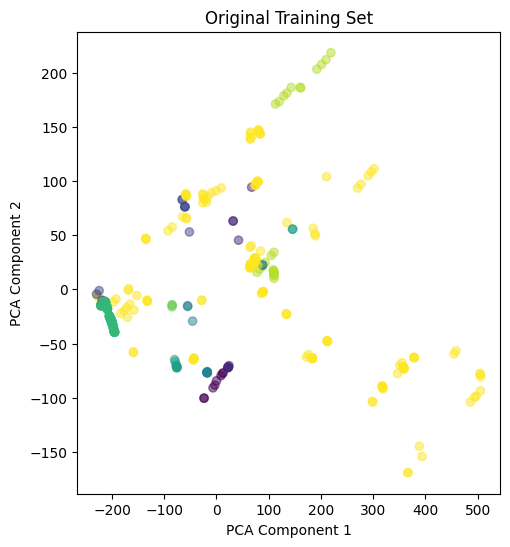

In [197]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Original Training Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [198]:
from imblearn.over_sampling import SMOTE

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE with adjusted k_neighbors
# Set k_neighbors to a value less than or equal to the smallest number of samples in any class
smote = SMOTE(random_state=42, k_neighbors=2)  # Adjust k_neighbors as needed
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)


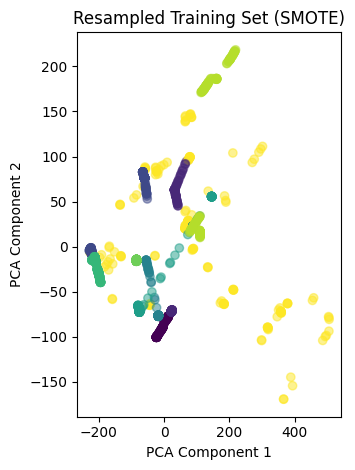

In [199]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

X_train_resampled_pca = pca.transform(X_resampled_smote)

plt.subplot(1, 2, 2)
plt.scatter(X_train_resampled_pca[:, 0], X_train_resampled_pca[:, 1], c=y_resampled_smote, cmap='viridis', alpha=0.5)
plt.title('Resampled Training Set (SMOTE)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [204]:

print(X_train.shape)
print(X_resampled_smote.shape)
print(y_resampled_smote.shape)

(364, 26)
(1602, 26)
(1602,)


In [205]:
pd.Series(y_train).value_counts()

band
9.0    178
6.0    103
8.0     27
4.0     14
5.0     11
1.0     10
2.0     10
0.0      8
7.0      3
Name: count, dtype: int64

In [206]:
pd.Series(y_resampled_smote).value_counts()

band
1.0    178
5.0    178
9.0    178
2.0    178
6.0    178
0.0    178
4.0    178
8.0    178
7.0    178
Name: count, dtype: int64

In [220]:
from sklearn.preprocessing import MinMaxScaler

# Apply normalization using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled_smote)
X_test_scaled = scaler.transform(X_test)

# Convert the normalized data back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Combine the normalized features with the target variable (if applicable)
df_normalized = pd.concat([X_normalized_df, y_resampled_smote], axis=1)


In [218]:
df_normalized

coolant_temperature  oil_pressure  oil_TDN1  oil_temp1  oil_TDN2  \
0                0.511512      0.574707  0.412581   0.412632  0.308804   
1                0.363363      0.582604  0.302162   0.302211  0.168272   
2                0.587588      0.598400  0.033675   0.033579  0.552159   
3                0.567568      0.578655  0.232765   0.233006  0.290365   
4                0.567568      0.448738  0.012059   0.011876  0.308804   
5                0.615616      1.000000  0.043433   0.043544  0.023422   
6                0.719720      0.657238  0.111490   0.111384  0.104817   
7                0.647648      1.000000  0.070535   0.070844  0.025083   
8                0.703704      0.492175  0.070535   0.070844  0.301993   
9                0.329329      0.339524  0.572696   0.572482  0.551329   
10               0.731732      1.000000  0.078953   0.079034  0.025083   
11               0.475475      0.551013  0.041638   0.041769  0.374751   
12               0.295295      0.362497  0.556542   0.556511  0.543854   
13               0.387387      0.641442  0.113083   0.114660  0.140365   
14               0.507508      0.610246  0.057110   0.057330  0.432724   
15               0.463463      0.551013  0.056200   0.056102  0.575249   
16               0.467467      1.000000  0.024573   0.024570  0.008804   
17               0.383383      0.312722  0.320364   0.320639  0.221429   
18               0.151151      1.000000  0.412742   0.412776  0.223256   
19               0.375375      0.570758  0.252685   0.252741  0.248339   
20               0.591592      1.000000  0.043686   0.043817  0.023422   
21               0.759760      1.000000  0.092150   0.092138  0.025083   
22               0.551552      0.669085  0.448692   0.448812  0.508804   
23               0.903904      1.000000  0.134155   0.134395  0.533887   
24               0.491491      0.578655  0.412583   0.412633  0.308804   
25               0.607608      0.688829  0.073948   0.074120  0.045847   
26               0.711712      0.432942  0.354494   0.354627  0.653322   
27               0.287287      0.366326  0.556542   0.556511  0.536379   
28               0.235235      0.558911  0.412742   0.412776  0.288870   
29               0.527528      0.590502  0.155276   0.155263  0.435714   
30               0.847848      0.413198  0.362912   0.362817  0.843854   
31               0.301301      0.602349  0.286689   0.286650  0.168272   
32               0.675676      0.645391  0.111490   0.111384  0.066777   
33               0.671672      0.547064  0.276310   0.276236  0.446678   
34               0.543544      1.000000  0.034585   0.035627  0.023422   
35               0.329329      0.590502  0.298521   0.298526  0.168272   
36               0.523524      1.000000  0.028669   0.028665  0.023422   
37               0.927928      1.000000  0.133268   0.133511  0.533887   
38               0.471471      0.629596  0.297383   0.297297  0.482724   
39               0.535536      0.448738  0.086545   0.086539  0.305814   
40               0.771772      1.000000  0.097156   0.097052  0.025083   
41               0.759760      1.000000  0.092150   0.092138  0.025083   
42               0.567568      0.448738  0.012059   0.011876  0.308804   
43               0.183183      1.000000  0.412742   0.412776  0.255980   
44               0.547548      0.436891  0.035722   0.035627  0.314784   
45               0.503504      1.000000  0.028669   0.028665  0.022591   
46               0.603604      0.554962  0.331741   0.331695  0.510631   
47               0.699700      0.649340  0.111490   0.111384  0.078738   
48               0.615616      1.000000  0.043433   0.043544  0.023422   
49               0.563564      1.000000  0.038680   0.038903  0.023422   
50               0.459459      0.558911  0.040728   0.040950  0.374751   
51               0.583584      1.000000  0.042548   0.042588  0.023422   
52               0.655656      0.653289  0.111490   0.111384  0.057973   
53        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 15, Accuracy: 0.9022


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 16, Accuracy: 0.8587
Number of features: 17, Accuracy: 0.8478


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 18, Accuracy: 0.9239


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 19, Accuracy: 0.9130


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 20, Accuracy: 0.9239


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 21, Accuracy: 0.9239


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 22, Accuracy: 0.9348


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 23, Accuracy: 0.9348


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 24, Accuracy: 0.9457


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 25, Accuracy: 0.9457


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


Number of features: 26, Accuracy: 0.9239
Features for k = 18: ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_11', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_25']


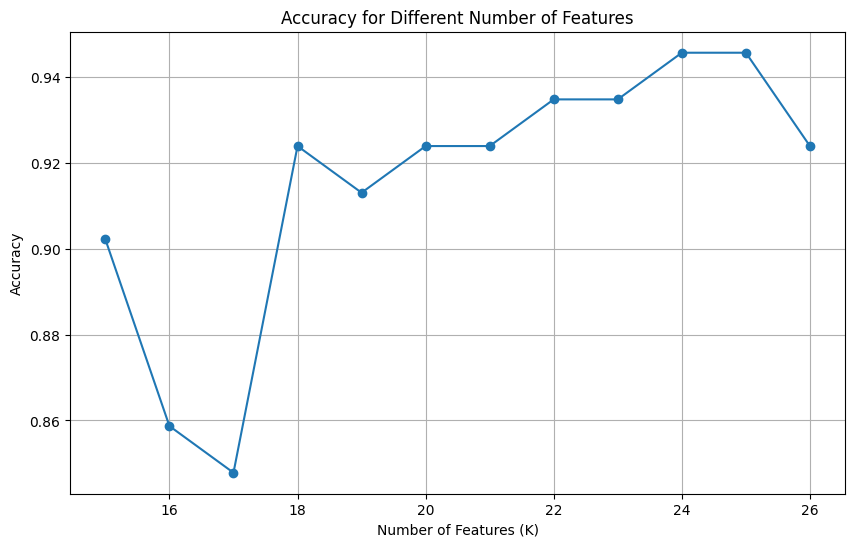

In [233]:
# Apply ANOVA and Logistic Regression for different values of K (15 to 26)
k_values = range(15, 27)
accuracy_scores = []
best_k = 0
best_score = 0
best_features_indices = None

for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = selector.fit_transform(X_normalized_df, y_resampled_smote)
    X_test_kbest = selector.transform(X_test_scaled)

    # Train logistic regression model
    model = LogisticRegression(random_state=42, max_iter=10000)
    model.fit(X_train_kbest, y_resampled_smote)
    score = model.score(X_test_kbest, y_test)
    accuracy_scores.append(score)

    print(f"Number of features: {k}, Accuracy: {score:.4f}")

    # Track the best score and corresponding features
    if score > best_score:
        best_k = k
        best_score = score
        best_features_indices = selector.get_support(indices=True)

    if k == 18:
        features_for_k_18 = [feature_names[i] for i in selector.get_support(indices=True)]

print(f"Features for k = 18: {features_for_k_18}")



# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy for Different Number of Features')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [237]:
print(f"Features for k = 18: {features_for_k_18}")


Features for k = 18: ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_11', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_25']


In [243]:
X = X_normalized_df.shape

In [244]:
y = y_resampled_smote.shape

In [246]:
# Assuming X_normalized_df is your DataFrame
X = X_normalized_df.copy()  # Create a copy to avoid modifying the original
X = X.drop(X.columns[[8,9,10,12,13,22,23,24]], axis=1)  # Use a list for column indices
X.head()

coolant_temperature  oil_pressure  oil_TDN1  oil_temp1  oil_TDN2  \
0             0.511512      0.574707  0.412581   0.412632  0.308804   
1             0.363363      0.582604  0.302162   0.302211  0.168272   
2             0.587588      0.598400  0.033675   0.033579  0.552159   
3             0.567568      0.578655  0.232765   0.233006  0.290365   
4             0.567568      0.448738  0.012059   0.011876  0.308804   

   oil_temp2  vibration_1_x  vibration_1_y  vibration_2_y  vibration_3_x  \
0   0.308819       0.544951       0.231961       0.186208       0.350560   
1   0.168610       0.536260       0.241518       0.082361       0.370552   
2   0.552167       0.213732       0.190037       0.151278       0.464380   
3   0.291480       0.214198       0.233476       0.000000       0.000007   
4   0.308819       0.684587       0.681723       0.210644       0.560013   

   vibration_3_y  vibration_3_z  vibration_3_n  vibration_4_x  vibration_4_y  \
0       0.628208       0.246822       0.918955       0.803215       0.845463   
1       0.650265       0.348883       0.937096       0.216219       0.360527   
2       0.769190       0.418386       0.920998       0.585742       0.536496   
3       0.000061       0.000007       0.953243       0.713435       0.583792   
4       0.813645       0.866501       0.889221       0.954832       0.543252   

   vibration_4_z  vibration_4_n  vtotal_y_rms  
0       0.557447       0.901149      0.686887  
1       0.469965       0.968088      0.618497  
2       0.587449       0.957140      0.000195  
3       0.511671       0.000000      0.248263  
4       0.667756       0.993695      0.965220

In [247]:
X.shape

(1602, 18)

In [262]:
y = pd.DataFrame(y_resampled_smote)

In [263]:
y.head()

band
0   1.0
1   5.0
2   9.0
3   9.0
4   2.0

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test_scaled)

# Print predictions
print("Predicted target values for the test data:")
print(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted target values for the test data:
[7. 2. 0. 0. 4. 0. 7. 6. 6. 8. 1. 6. 8. 7. 6. 0. 2. 4. 2. 8. 0. 0. 0. 9.
 4. 9. 8. 0. 1. 2. 4. 5. 2. 7. 7. 2. 2. 4. 7. 5. 9. 7. 8. 1. 4. 5. 8. 1.
 0. 5. 4. 2. 2. 6. 5. 6. 4. 6. 9. 4. 1. 6. 4. 4. 8. 4. 2. 0. 1. 1. 6. 4.
 6. 5. 7. 7. 7. 0. 2. 4. 9. 8. 2. 6. 0. 8. 4. 6. 7. 2. 2. 6. 7. 5. 4. 5.
 7. 4. 4. 7. 2. 5. 9. 7. 9. 0. 8. 7. 1. 4. 9. 0. 2. 9. 0. 5. 5. 7. 7. 6.
 4. 1. 4. 4. 7. 7. 1. 7. 1. 8. 5. 6. 0. 1. 9. 1. 5. 0. 6. 9. 6. 1. 7. 4.
 5. 2. 5. 7. 2. 0. 7. 1. 4. 6. 1. 5. 2. 1. 5. 1. 0. 7. 1. 7. 6. 7. 4. 7.
 7. 2. 7. 1. 5. 0. 0. 7. 7. 4. 2. 8. 8. 9. 8. 0. 2. 7. 8. 4. 2. 2. 0. 7.
 0. 9. 2. 2. 8. 7. 6. 4. 2. 4. 6. 5. 8. 4. 2. 2. 9. 1. 5. 6. 4. 1. 6. 4.
 1. 9. 7. 4. 1. 7. 5. 6. 0. 1. 6. 8. 2. 6. 0. 4. 5. 6. 6. 5. 4. 8. 7. 8.
 1. 7. 9. 4. 6. 0. 4. 2. 0. 2. 4. 7. 1. 0. 5. 4. 4. 2. 1. 0. 6. 5. 6. 7.
 7. 5. 2. 8. 7. 7. 6. 1. 6. 4. 8. 6. 7. 4. 7. 6. 4. 0. 7. 7. 1. 7. 2. 9.
 5. 8. 7. 0. 7. 1. 4. 0. 0. 4. 0. 8. 7. 8. 7. 2. 7. 2. 0. 4. 7. 1. 4. 8.
 8. 9. 8

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network model
modela = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Adjust output layer to match number of classes
])

# Compile the model
modela.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
modela.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = modela.evaluate(X_train, y_train)
test_loss, test_accuracy = modela.evaluate(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20
32/32 [==============================] - 4s 50ms/step - loss: 2.1772 - accuracy: 0.2559 - val_loss: 2.0681 - val_accuracy: 0.4475
Epoch 2/20
32/32 [==============================] - 1s 18ms/step - loss: 1.9354 - accuracy: 0.5850 - val_loss: 1.8303 - val_accuracy: 0.6109
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 1.6490 - accuracy: 0.6357 - val_loss: 1.5495 - val_accuracy: 0.6381
Epoch 4/20
32/32 [==============================] - 0s 10ms/step - loss: 1.3340 - accuracy: 0.7529 - val_loss: 1.2478 - val_accuracy: 0.7782
Epoch 5/20
32/32 [==============================] - 0s 8ms/step - loss: 1.0464 - accuracy: 0.8691 - val_loss: 0.9672 - val_accuracy: 0.8872
Epoch 6/20
32/32 [==============================] - 0s 11ms/step - loss: 0.8166 - accuracy: 0.8926 - val_loss: 0.7743 - val_accuracy: 0.9027
Epoch 7/20
32/32 [==============================] - 0s 11ms/step - loss: 0.6434 - accuracy: 0.9062 - val_loss: 0.6130 - val_accuracy: 0.9183
Epoch 8/20
32/3

In [311]:
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVC model
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 1.0000
Test Accuracy: 1.0000


In [312]:
# Function to make predictions
def predict(input_data):
    # Convert the input data to a numpy array
    input_data = np.asarray(input_data)

    # Reshape the input data as we are predicting for one instance
    input_data = input_data.reshape(1, -1)

    # Normalize the input data
    input_data = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)

    return prediction, prediction_proba

# Make prediction
input_data = (62.25, 8.307210031, 416.1, 5.34, 737.7, 23.2, 43.12169, 43.56363, 1.63906, 500, 6.947433, 28, 102.9327, 23.64812, 11.82476, 21.73209, 101.2401, 20.79)
predicted_class, prediction_proba = predict(input_data)

# Output the prediction and probabilities
print(f"Predicted Class: {predicted_class[0]}")
print(f"Prediction Probabilities: {prediction_proba}")

Predicted Class: 9.0
Prediction Probabilities: [[0.00671712 0.00466073 0.01572332 0.01623365 0.01376053 0.02776055
  0.01097271 0.00980224 0.89436915]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [314]:
input_data = (62.25, 8.307210031, 416.1, 5.34, 737.7, 23.2, 43.12169, 43.56363, 1.63906, 500, 6.947433, 28, 102.9327, 23.64812, 11.82476, 21.73209, 101.2401, 20.79)
id = np.asarray(input_data)
idr = id.reshape(1,-1)
prediction = model.predict(idr)
print(prediction)

if (prediction[0] == 0):
  print("band0")
elif (prediction[0] == 1):
  print("band1")
elif (prediction[0] == 2):
  print("band2")
elif (prediction[0] == 3):
  print("band3")
elif (prediction[0] == 4):
  print("band4")
elif (prediction[0] == 5):
  print("band5")
elif (prediction[0] == 6):
  print("band6")
elif (prediction[0] == 7):
  print("band7")
elif (prediction[0] == 8):
  print("band8")
else:
  print("band9")

[8.]
band8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [280]:
import pickle
pickle.dump(model, open('modell.pkl', 'wb'))

In [ ]:
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test_scaled)

# Print predictions
print("Predicted target values for the test data:")
print(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")